In [1]:
#Import the frequently used libraries
#Import necessary modules to read, clean, analyse and visualise data

import csv
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import re
import string
from textblob import TextBlob


In [2]:
pip install wordcloud

  Using cached wordcloud-1.8.1-cp37-cp37m-manylinux1_x86_64.whl (366 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install ekphrasis

Processing ./.cache/pip/wheels/f7/ec/0d/12659e32faf780546945d0120f2c8410eb3efb7426731da88f/ekphrasis-0.5.1-py3-none-any.whl
Processing ./.cache/pip/wheels/3f/e3/ec/8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2/termcolor-1.1.0-py3-none-any.whl
  Using cached ujson-4.0.1-cp37-cp37m-manylinux1_x86_64.whl (179 kB)
  Using cached colorama-0.4.4-py2.py3-none-any.whl (16 kB)
Processing ./.cache/pip/wheels/49/1c/fc/8b19700f939810cd8fd9495ae34934b246279791288eda1c31/ftfy-5.8-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install wordsegment

  Using cached wordsegment-1.3.1-py2.py3-none-any.whl (4.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
#Import necessary packages for textual and sentiment analysis 

import nltk

nltk.download('punkt')
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


#These functions are used for preprocessing mainly
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet


[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [6]:
data_con = pd.read_csv("Twitter_final_10.csv", sep=',' , encoding='latin-1',nrows=700)

In [7]:
data_con.head()

,timestamp,hashtags,tweets,replies,retweets,likes,username,location,friends,followers,verified,all_hashtags,all_hashtags_seg,tweets_clean,tweets_token,tweets_nonstop,tags_token,tags_nonstop,label
0,2020-10-01 23:49:31,peace,#ÕÔ±ÕÔ¹ÕÕÕÔµÕÕ #StopAzerbaijanAggressio...,NaN,NaN,1.0,AniGharibyan5,"Los Angeles, CA",338,223,0,ÕÔ±ÕÔ¹ÕÕÕÔµÕÕ StopAzerbaijanAggression ...,stop azerbaijan aggression stop aliev armenia ...,,[],[],"['stop', 'azerbaijan', 'aggression', 'stop', '...","['stop', 'azerbaijan', 'aggression', 'stop', '...",Azerbaijan_Armenia
1,2020-10-01 22:55:40,peace,Our World is in dire need of #Peace and relief...,NaN,NaN,1.0,AUTKumba,"Kumba, Cameroon",21,4,0,Peace viruses plagues metals violence,peace viruses plagues metals violence,Our World is in dire need of and relief from ...,"['our', 'world', 'is', 'in', 'dire', 'need', '...","['world', 'dire', 'need', 'relief']","['peace', 'viruses', 'plagues', 'metals', 'vio...","['peace', 'viruses', 'plagues', 'metals', 'vio...",covid
2,2020-10-01 22:52:37,peace,Water Transfer With Transaqua Will Bring Peace...,NaN,NaN,1.0,lfreemansafrica,NaN,176,265,0,LakeChad LakeChadBsin Transaqua Watertransfer ...,lake chad lake chad bs in trans aqua water tra...,Water Transfer With Transaqua Will Bring Peace...,"['water', 'transfer', 'with', 'transaqua', 'wi...","['water', 'transfer', 'transaqua', 'bring', 'p...","['lake', 'chad', 'lake', 'chad', 'bs', 'in', '...","['lake', 'chad', 'lake', 'chad', 'bs', 'trans'...",Africa
3,2020-10-01 22:32:07,peace,Ô½Õ¡Õ²Õ¡Õ² Õ£Õ«Õ·Õ¥Ö Õ¢Õ¸Õ¬Õ¸ÖÕ«Õ½\n#peace #...,NaN,NaN,NaN,ase_casas,NaN,8,5,0,peace StopAzerbaijaniAggression NagornoKarabak...,peace stop azerbaijani aggression nagorno kara...,Ô½Õ¡Õ²Õ¡Õ² Õ£Õ«Õ·Õ¥Ö Õ¢Õ¸Õ¬Õ¸ÖÕ«Õ½,"['Õ­Õ¡Õ²Õ¡Õ²', 'Õ£Õ«Õ·Õ¥Ö', 'Õ¢Õ¸Õ¬Õ¸ÖÕ«Õ½']","['Õ­Õ¡Õ²Õ¡Õ²', 'Õ£Õ«Õ·Õ¥Ö', 'Õ¢Õ¸Õ¬Õ¸ÖÕ«Õ½']","['peace', 'stop', 'azerbaijani', 'aggression',...","['peace', 'stop', 'azerbaijani', 'aggression',...",Azerbaijan_Armenia
4,2020-10-01 22:29:50,peace,#Peace cannot be kept by force. It can only be...,NaN,NaN,1.0,v_gayane,Armenia,87,52,0,Peace World StopErdogan StopCriminal StopAliev...,peace world stop erdogan stop criminal stop al...,cannot be kept by force It can only be achiev...,"['can', 'not', 'be', 'kept', 'by', 'force', 'i...","['kept', 'force', 'achieved', 'understanding',...","['peace', 'world', 'stop', 'erdogan', 'stop', ...","['peace', 'world', 'stop', 'erdogan', 'stop', ...",Azerbaijan_Armenia


In [8]:
last_tweet=data_con.iloc[0].timestamp
first_tweet=data_con.iloc[-1].timestamp
format_date="%Y-%m-%d %H:%M:%S"
time_span=datetime.strptime(last_tweet, format_date)-datetime.strptime(first_tweet, format_date)
print("Tweets were collected over the time of:", time_span)
print('The first tweet was postet on:', first_tweet, 'and the last tweet was posted on:', last_tweet)

Tweets were collected over the time of: -6 days, 23:51:12
The first tweet was postet on: 2020-10-06 23:58:19 and the last tweet was posted on: 2020-10-01 23:49:31


In [9]:
from ekphrasis.classes.segmenter import Segmenter
from wordsegment import load, segment
load()
segment('thisisatest hello how are you')

['this', 'is', 'a', 'test', 'hello', 'how', 'are', 'you']

In [10]:
#Pre-processing of hashtags

def preprocess_hashtags(hashtags):
    """This function will clean the hashtags through removal of the brackets 
    and converting all letters to the lower case for better understanding. 
    Punctuations will be removed as well followed by tokenisation of each hashtag"""
    hashtags=hashtags.replace('[','') #Replaces the brackets
    hashtags=hashtags.replace(']','')
    hashtags=hashtags.translate(str.maketrans('', '', string.punctuation)) #makestrans() translates each punctutation to none = ''
    #The following tokenisation is not necessarily needed for the hashtags since no lemmatising/semantic analysis will be done. 
    hashtag_tokens=word_tokenize(hashtags.lower()) #word_tokenize returns a tokenised version with divided substrings and lower cases
    
    return " ".join(hashtag_tokens) #Joins all tokenised substrings

#def segment_hashtags(string):
    #hashtag_tokens=segment(preprocess_hashtags(hashtags))
    #return hashtag_tokens

def segment_hashtags(string):
    string='  '.join(segment(preprocess_hashtags(hashtags)))
    hashtag_tokens=word_tokenize(string)
    return " ".join(hashtag_tokens)

#segment_hashtags(preprocess_hashtags(hashtags))
#Get the number of hashtags for each tweet

def hashtag_len(hashtags):
    """This function returns the number of hashtags used within a tweet"""
    hashtag_tokens=word_tokenize(hashtags) #Tokenisation is necessary to create substrings which then can be countet
    return len(hashtag_tokens)


#Prints out hashtags for each tweet and the number of hashtags used

for hashtags in data_con.all_hashtags:
    output_length = hashtag_len(segment_hashtags(hashtags)) #passes the output of the first function into the argument of the second function
    print(output_length)
    print(segment_hashtags(hashtags))
    #print(' '.join(segment(preprocess_hashtags(hashtags))))
    #print(" ")

14
stop azerbaijan aggression stop aliev armenia artsakh for victory peace kim kardashiankhloekardashia nserjtankianrobkardashi an
5
peace viruses plagues metals violence
16
lake chad lake chad bs in trans aqua water transfer poverty africa nigeria abuja conference peace
9
peace stop azerbaijani aggression nagorno karabakh yerevan armenian genocide
13
peace world stop erdogan stop criminal stop aliev stop wars top azerbaijani aggression
11
armenia artsakh peace artsakh strong stop azerbaijani aggression stop turkish aggression
7
peace stop azerbaijani aggression artsakh strong armenia
11
stop azerbaijani aggression artsakh strong artsakh for victory armenia armenians peace
8
greatness african independence keep on moving peace unity
18
armenians los angeles win victory peace stop azerbaijani aggression stop aliyev stop erdogan artsakh strong stepanakert nk peace
7
spread love artsakh strong peace love armenia
13
azerbaijan azerbaijan is not alone karabakh is azerbaijan peace safety peac

In [11]:
#Pre-processing of tweets

"""Stop words such as 'the', 'and', 'a' etc. should be excluded from our tweets.
This is due to several reasons: Stop words are very frequent and would interfere with our semantic and textual analysis 
as well as word classification. """

stop_words = set(stopwords.words('english')) #This function defines a set of stop words within the English language

"""The next cleaning step of tweet data includes regular expression operations, word_tokenize, 
WordNetLemmatizer and nltk.pos_tag from the nltk library"""

def preprocess_tweets(tweet):
    """This function will clean the tweets through several steps for better understanding and further analysis. 
    Steps include lowering cases, replacing punctuations, removal of b's, removal of special strings,
    removal of URLS, removal of hashtags and tags, removal of stopwords and tokenisation and lemmatisation of tweet words"""
    #Converts all uppercase characters into lowercase characters
    tweet=tweet.lower() 
    #Replaces &amp; with &
    tweet=tweet.replace('&amp;','&')
    #Removes the 'b'' or 'b"'  string at the beginning of each tweet
    tweet = re.sub(r"(b')|(b\")","",tweet, flags=re.MULTILINE)
    #Removes characters with random string and integer combinations, such as "\xe2x80x9c"
    tweet = re.sub(r'[0-9]*\\x+([a-z]|[0-9]|[\\])*[^A-Z]', "", tweet)
    #Removes URLs via regular expression operations. Any pattern that starts with http (or https... ) followed by one or more non-white-space characters will be removed
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    #Removes tags with '@' and hashtag character '#'
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Removes any punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # Removes stopwords and tokenises tweet string to substrings
    tweet_tokens = word_tokenize(tweet)
    filtered_words = [w for w in tweet_tokens if not w in stop_words]
    
    #Defines lemmatizer using WordNetLemmatizer from nltk.stem
    lm = WordNetLemmatizer()
    #Lemmatises each pre-filtered tweet token with the correct POS (part of speech) tag 
    lemmatized_words = [lm.lemmatize(w, get_pos(w)) for w in filtered_words]

    return " ".join(lemmatized_words) #joins all tokenised and cleaned strings



"""nltk.pos_tag returns the POS tag for a given word (verb, noun etc.).
Get the correct nltk.pos_tag for each word with get_pos:"""

def get_pos(word):
        """Maps the POS tag to a character to pass it on via a dictionnary"""
        tag = nltk.pos_tag(word)[0][1][0].lower() #Returns the first string of the POS tag for the word (e.g. n,j,v)
        """WordNet is our lexical database which includes nouns, verbs, adjectives and adverbs. 
        Other words such as prepositions are ignored"""
        tagging_dict = {"j": wordnet.ADJ, #Creates dictionnary with POS tags which is needed for lemmatize()
                "n": wordnet.NOUN,
                "r": wordnet.ADV,
                "v": wordnet.VERB}
        return tagging_dict.get(tag, wordnet.NOUN) #value=wordnet.Noun if no other value is found for the tag

    
    
    
"""Next, we want to get the number of strings within each cleaned tweet"""  

def clean_tweet_len(tweet):
    """Returns the number of strings in a tweet"""
    tweet_tokens=word_tokenize(tweet)
    return len(tweet_tokens)



# Finally, we want to print our results to take a look:

for tweets in data_con.tweets:
    print(preprocess_tweets(tweets))
    print("")

õô±õô¹õõõôµõõ stopazerbaijanaggression stopaliev armenia artsakh forvictory peace kimkardashian khloekardashian serjtankian robkardashian

world dire need peace relief virus plague metal violence

water transfer transaqua bring peace development lake chad basin lakechad lakechadbsin transaqua watertransfer poverty africa nigeria abujaconference peace

ô½õ¡õ²õ¡õ² õ£õ « õ·õ¥ö õ¢õ¸õ¬õ¸öõ « õ½ peace stopazerbaijaniaggression nagornokarabakh yerevan armeniangenocide

peace kept force achieved understanding âalbert einstein world speak make understand stoperdogan stopcriminal stopaliev stopwar stopazerbaijaniaggression

lot proof evidence aggressor azerbaijan turkey armenia artsakh peace artsakhstrong stopazerbaijaniaggression stopturkishaggression

yerevan want peace baku want yerevan stopazerbaijaniaggression artsakhstrong armenia

love respect man stopazerbaijaniaggression artsakhstrong artsakh forvictory armenia armenian peace

happy independence day nigeria 60th year nation g

After all the cleaning steps, we want to create a DataFrame with all columns that we find useful for our further analysis.

In [12]:
clean_tweets = data_con.loc[:,("username","followers","location")] #Creates DataFrame with original columns username and followers_count


clean_tweets['Clean_tweet'] = data_con['tweets'].apply(preprocess_tweets)#Adds a new column with cleaned tweets
clean_tweets['Clean_hashtags'] = data_con['all_hashtags'].apply(preprocess_hashtags) #Adds a new column with cleaned hashtags
clean_tweets['Hashtag_count'] = clean_tweets['Clean_hashtags'].apply(hashtag_len) #Adds a new column with number of hashtags for each tweet
clean_tweets['Word_count']= clean_tweets['Clean_tweet'].apply(clean_tweet_len)
#Adds a new column with number of strings within each tweet

In [13]:
def segment_hashtags(hashtag):
    string='  '.join(segment(hashtag))
    hashtag_tokens=word_tokenize(string)
    return " ".join(hashtag_tokens)

In [14]:
def segment_tweets(tweet):
    string='  '.join(segment(tweet))
    tweet_tokens=word_tokenize(string)
    return " ".join(tweet_tokens)

In [16]:
clean_tweets['Clean_hashtags'] = clean_tweets['Clean_hashtags'].apply(segment_hashtags)
clean_tweets['Hashtag_count'] = clean_tweets['Clean_hashtags'].apply(hashtag_len)

clean_tweets['Clean_tweet'] = clean_tweets['Clean_tweet'].apply(segment_tweets)
clean_tweets['Word_count']= clean_tweets['Clean_tweet'].apply(clean_tweet_len)

In [17]:
clean_tweets.Clean_tweet.tail()

695    chronology renewed conflict nagorny karabakh s...
696    turkey trump east mediterranean vaccine peace ...
697    armenian aggressors continue bring illegal com...
698    conflict interest covid19 much money trump mak...
699    armenian armenia azerbaijan azerbaijan army na...
Name: Clean_tweet, dtype: object

In [18]:
#Remove rows with same Clean_tweet content
clean_tweets.drop_duplicates(subset="Clean_tweet",keep="first",inplace=True) #drops duplicates and keeps the first version of it

In [19]:
#Remove rows without location
clean_tweets = clean_tweets[clean_tweets['location'].notna()]

In [20]:
#drop rows with irrelevant words, ~ is for negation of operation
exclude_words = ['workplace','employees','company','coaching','fitness','music','parenting']
clean_tweets = clean_tweets[~clean_tweets.Clean_tweet.str.contains('|'.join(exclude_words))]
clean_tweets = clean_tweets[~clean_tweets.Clean_hashtags.str.contains('|'.join(exclude_words))]

In [21]:
clean_tweets.head()

,username,followers,location,Clean_tweet,Clean_hashtags,Hashtag_count,Word_count
0,AniGharibyan5,223,"Los Angeles, CA",stop azerbaijan aggression stop aliev armenia ...,stop azerbaijan aggression stop aliev armenia ...,14,14
1,AUTKumba,4,"Kumba, Cameroon",world dire need peace relief virus plague meta...,peace viruses plagues metals violence,5,9
4,v_gayane,52,Armenia,peace kept force achieved understanding albert...,peace world stop erdogan stop criminal stop al...,13,22
6,lusinmkrt,403,Armenia,yerevan want peace baku want yerevan stop azer...,peace stop azerbaijani aggression artsakh stro...,7,12
8,seyimusic,"3,696",washington dc/Lagos,happy independence day nigeria 60th year natio...,greatness african independence keep on moving ...,8,21


In [22]:
#new indexing so that removed duplicate row indeces won't be missing in further analysis 
clean_tweets.reset_index(drop=True, inplace=True) #drops the index

clean_tweets.index.values.max() #returns the last row index of the data set

409

In [23]:
"""This assert makes sure that there are as many unique tweets as number of rows"""

if not len(list(clean_tweets.Clean_tweet.unique())) == clean_tweets.shape[0]:
    assert False

In [24]:
"""This assert makes sure that the indexing is correct"""

if not clean_tweets.index.values.max() == (len(list(clean_tweets.Clean_tweet.unique()))-1): #-1 since indexing starts at 0
    assert False

In [25]:
len(clean_tweets.location.unique())

212

Now, we want to create a new column that decodes the latitude and longitude values for each country or city.

In [26]:
pip install geopandas

  Using cached geopandas-0.8.1-py2.py3-none-any.whl (962 kB)
  Using cached Shapely-1.7.1-cp37-cp37m-manylinux1_x86_64.whl (1.0 MB)
  Using cached Fiona-1.8.18-cp37-cp37m-manylinux1_x86_64.whl (14.8 MB)
  Using cached pyproj-3.0.0.post1-cp37-cp37m-manylinux2010_x86_64.whl (6.4 MB)
  Using cached munch-2.5.0-py2.py3-none-any.whl (10 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached cligj-0.7.1-py3-none-any.whl (7.1 kB)
Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install geopy

  Using cached geopy-2.0.0-py3-none-any.whl (111 kB)
  Using cached geographiclib-1.50-py3-none-any.whl (38 kB)
Note: you may need to restart the kernel to use updated packages.


In [28]:
clean_string = ''.join(clean_tweets["Clean_tweet"])
clean_hasht = ''.join(clean_tweets["Clean_hashtags"])

#Frequency of most common terms in "Clean_tweet" is calculated

#Create a new DataFrame with tokenised words of all tweets
df_words = pd.DataFrame(nltk.tokenize.word_tokenize(clean_string), columns=["words"])
#Count the frequency of each word using value_counts()
word_freq = df_words["words"].value_counts() #This is a pandas.series


#Convert series to a dictionnairy to a dataframe
frame_word_freq = {"word": word_freq.index, "frequency": word_freq} #Creates a dictionnairy
df_word_freq = pd.DataFrame(frame_word_freq) #Creates a DataFrame 
df_word_freq.reset_index(drop=True, inplace=True) #Drops the original index 

#Drops all rows with words that appear less than 7 times
df_word_freq = df_word_freq.drop(df_word_freq[df_word_freq.frequency < 70].index) 



In [29]:
#Frequency of most common terms in "Clean_hashtags" is calculated

#Create a new DataFrame with tokenised words of all hashtags
df_hashtags = pd.DataFrame(nltk.tokenize.word_tokenize(clean_hasht), columns=["hashtags"])
#Count the frequency of each word using value_counts()
hasht_freq = df_hashtags["hashtags"].value_counts()


# hasht_freq is a series. It will be converted into a dataframe to easily create a barchart
frame_hasht_freq = {"hashtag": hasht_freq.index, "frequency": hasht_freq} #Creates a dictionnairy 
df_hasht_freq = pd.DataFrame(frame_hasht_freq) #Creates a DataFrame 
df_hasht_freq.reset_index(drop=True, inplace=True) #Drops the original index 

#Drops all rows with hashtags that appear less than 4 times
df_hasht_freq = df_hasht_freq.drop(df_hasht_freq[df_hasht_freq.frequency < 70].index)

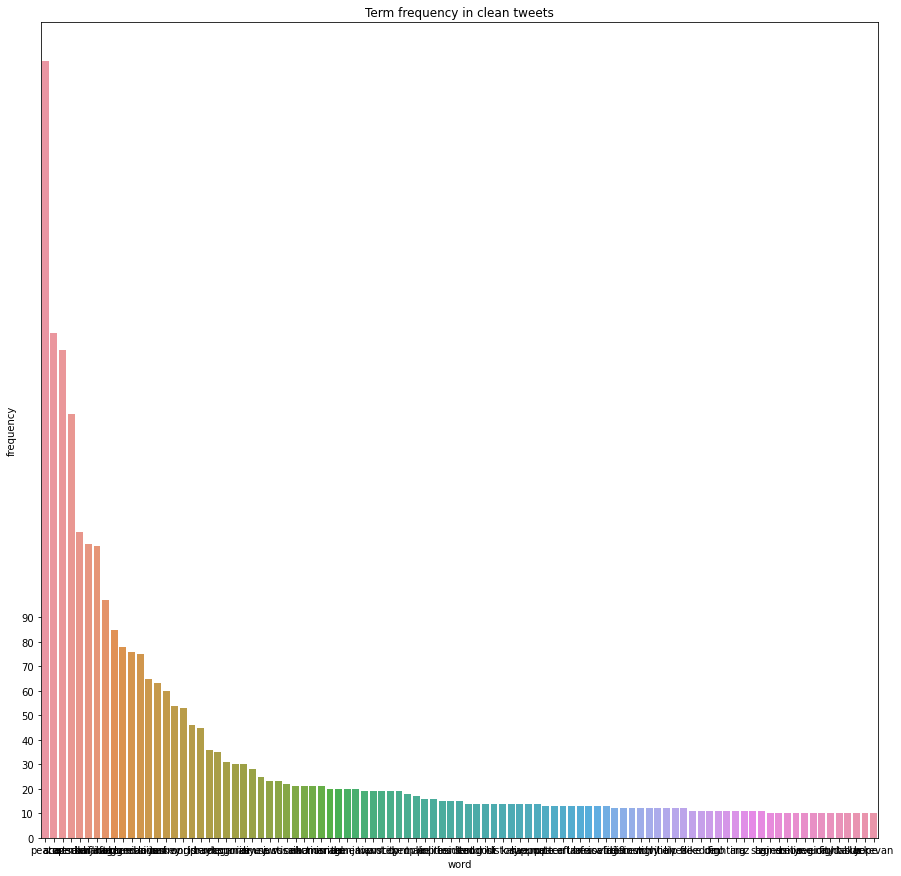

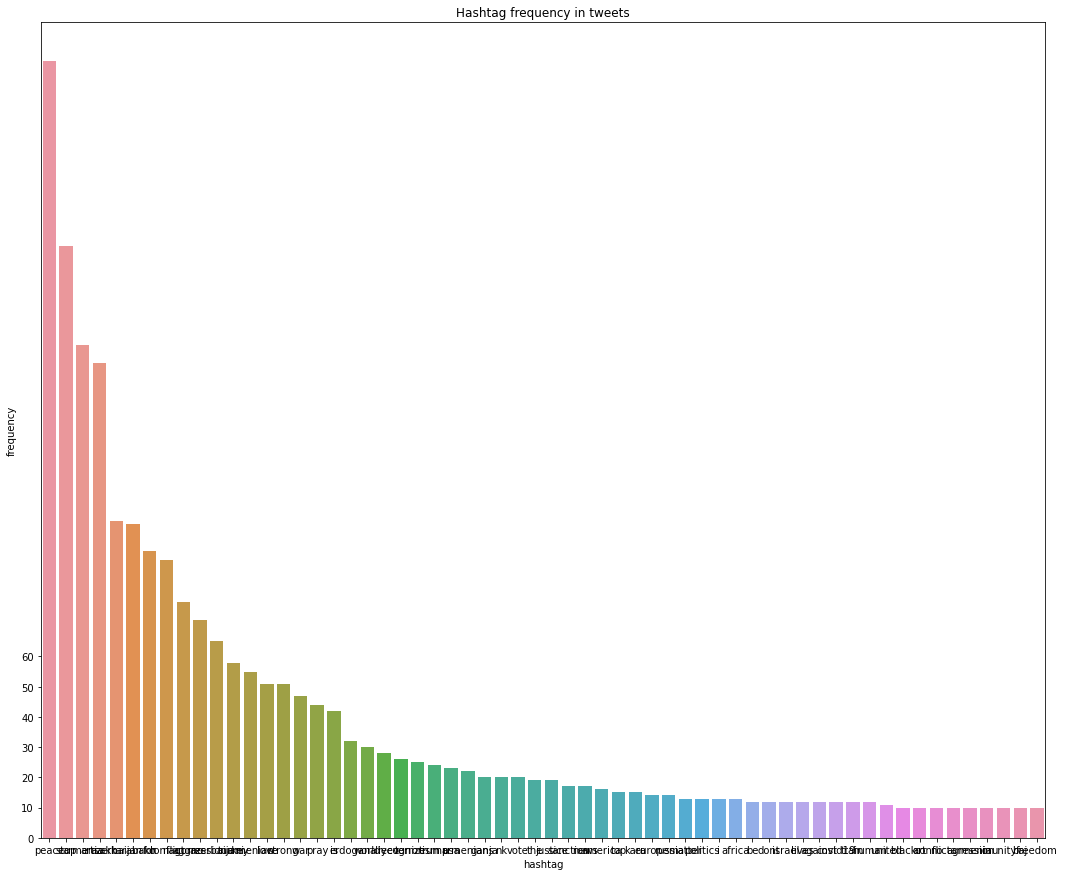

In [30]:
#Barplot fof frequency of terms in Clean_tweet

plt.figure(figsize=(15,15)) #Sets figure size

ax=sns.barplot(x="word",y="frequency", data=df_word_freq) #Creates a barchart for each word and its frequency
ax.set(title="Term frequency in clean tweets") #Sets the title
plt.yticks(np.arange(0,100,10)) #Sets the min, max values and tick size
plt.show()

#Barplot of frequency of terms in Clean_hashtags
plt.figure(figsize=(18,15)) #Sets figure size

hasht_ax=sns.barplot(x="hashtag",y="frequency", data=df_hasht_freq) #Creates a barchart for each word and its frequency
hasht_ax.set(title="Hashtag frequency in tweets") #Sets the title
plt.yticks(np.arange(0,70,10)) #Sets the min, max values and tick size
plt.show()

### Based on our findings from above, we now want to label tweets accordingly to their topic. For that reason, we will concentrate on the Armenia-Azerbaijan conflict and the US.

In [31]:
arm_aze_label = ['azerbaijan','armenia','armenian','azerbaijani','karabakh','nagorno','artsakh','aliyev']
usa_label = ['trump','obama','usa','harris','biden']
turkey_label = ['erdogan','turkey','istanbul']
covid_label = ['covid','covid19','corona','virus','i used htpandemic','coronavirus']
yemen_label = ['yemen','yemeni']
africa_label = ['africa','ethiopia']

In [32]:
def get_labels(tweet):
    if any(words in tweet for words in arm_aze_label):
        return 'Azerbaijan_Armenia'
    elif any(words in tweet for words in usa_label):
        return 'USA'
    elif any(words in tweet for words in turkey_label):
        return 'Turkey'
    elif any(words in tweet for words in covid_label):
        return 'covid'
    elif any(words in tweet for words in yemen_label):
        return 'Yemen'
    elif any(words in tweet for words in africa_label):
        return 'Africa'
    else:
        return 'Other'


        

In [33]:
clean_tweets['Label'] = clean_tweets['Clean_tweet'].apply(get_labels)

print(clean_tweets.Label)

0      Azerbaijan_Armenia
1                   covid
2      Azerbaijan_Armenia
3      Azerbaijan_Armenia
4                  Africa
              ...        
405                 covid
406    Azerbaijan_Armenia
407    Azerbaijan_Armenia
408    Azerbaijan_Armenia
409    Azerbaijan_Armenia
Name: Label, Length: 410, dtype: object


In [34]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install folium

  Using cached folium-0.11.0-py2.py3-none-any.whl (93 kB)
  Using cached branca-0.4.1-py3-none-any.whl (24 kB)
Note: you may need to restart the kernel to use updated packages.


In [37]:
from geopy.geocoders import Nominatim

In [38]:
from geopy.extra.rate_limiter import RateLimiter

In [39]:
import folium 

In [40]:
from folium.plugins import FastMarkerCluster

In [41]:
locator = Nominatim(user_agent='myGeocoder')
location = locator.geocode('Champ de Mars, Paris, France')

In [42]:
geocode = RateLimiter(locator.geocode, min_delay_seconds=3)
clean_tweets['geo_location'] = clean_tweets['location'].apply(geocode)
clean_tweets['point'] = clean_tweets['geo_location'].apply(lambda loc: tuple(loc.point) if loc else None)
clean_tweets[['latitude', 'longitude','altitude']] = pd.DataFrame(clean_tweets['point'].tolist(), index=clean_tweets.index)

In [43]:
clean_tweets.head(5)

,username,followers,location,Clean_tweet,Clean_hashtags,Hashtag_count,Word_count,Label,geo_location,point,latitude,longitude,altitude
0,AniGharibyan5,223,"Los Angeles, CA",stop azerbaijan aggression stop aliev armenia ...,stop azerbaijan aggression stop aliev armenia ...,14,14,Azerbaijan_Armenia,"(Los Angeles, Los Angeles County, California, ...","(34.0536909, -118.242766, 0.0)",34.053691,-118.242766,0.0
1,AUTKumba,4,"Kumba, Cameroon",world dire need peace relief virus plague meta...,peace viruses plagues metals violence,5,9,covid,"(Communauté urbaine de Kumba, Meme, Sud-Ouest,...","(4.6026770500000005, 9.414413491436562, 0.0)",4.602677,9.414413,0.0
2,v_gayane,52,Armenia,peace kept force achieved understanding albert...,peace world stop erdogan stop criminal stop al...,13,22,Azerbaijan_Armenia,"(Հայաստան, (40.7696272, 44.6736646))","(40.7696272, 44.6736646, 0.0)",40.769627,44.673665,0.0
3,lusinmkrt,403,Armenia,yerevan want peace baku want yerevan stop azer...,peace stop azerbaijani aggression artsakh stro...,7,12,Azerbaijan_Armenia,"(Հայաստան, (40.7696272, 44.6736646))","(40.7696272, 44.6736646, 0.0)",40.769627,44.673665,0.0
4,seyimusic,"3,696",washington dc/Lagos,happy independence day nigeria 60th year natio...,greatness african independence keep on moving ...,8,21,Africa,"(The Senate Garage Reflecting Pool, Washington...","(38.8943667, -77.0090599518688, 0.0)",38.894367,-77.009060,0.0


In [44]:
clean_tweets.columns

Index(['username', 'followers', 'location', 'Clean_tweet', 'Clean_hashtags',
       'Hashtag_count', 'Word_count', 'Label', 'geo_location', 'point',
       'latitude', 'longitude', 'altitude'],
      dtype='object')

In [45]:
clean_tweets = clean_tweets[clean_tweets['geo_location'].notna()]
clean_tweets.reset_index(drop=True, inplace=True) #drops the index
clean_tweets.index.values.max() #returns the last row index of the data set

351

In [46]:
map1 = folium.Map()

clean_tweets.apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]]).add_to(map1), axis=1)

map1

In [47]:
#add color to adjust marker color accordign to topic 

def topiccolors(Label):
    if Label == 'Azerbaijan_Armenia':
        return 'green'
    elif Label == 'USA':
        return 'blue'
    elif Label == 'Turkey':
        return 'black'
    elif Label == 'covid':
        return 'red'
    elif Label == 'Yemen':
        return 'purple'
    elif Label == 'Africa':
        return 'pink'
    else:
        return 'orange'
    
    
clean_tweets["color"] = clean_tweets['Label'].apply(topiccolors)
clean_tweets.head()

,username,followers,location,Clean_tweet,Clean_hashtags,Hashtag_count,Word_count,Label,geo_location,point,latitude,longitude,altitude,color
0,AniGharibyan5,223,"Los Angeles, CA",stop azerbaijan aggression stop aliev armenia ...,stop azerbaijan aggression stop aliev armenia ...,14,14,Azerbaijan_Armenia,"(Los Angeles, Los Angeles County, California, ...","(34.0536909, -118.242766, 0.0)",34.053691,-118.242766,0.0,green
1,AUTKumba,4,"Kumba, Cameroon",world dire need peace relief virus plague meta...,peace viruses plagues metals violence,5,9,covid,"(Communauté urbaine de Kumba, Meme, Sud-Ouest,...","(4.6026770500000005, 9.414413491436562, 0.0)",4.602677,9.414413,0.0,red
2,v_gayane,52,Armenia,peace kept force achieved understanding albert...,peace world stop erdogan stop criminal stop al...,13,22,Azerbaijan_Armenia,"(Հայաստան, (40.7696272, 44.6736646))","(40.7696272, 44.6736646, 0.0)",40.769627,44.673665,0.0,green
3,lusinmkrt,403,Armenia,yerevan want peace baku want yerevan stop azer...,peace stop azerbaijani aggression artsakh stro...,7,12,Azerbaijan_Armenia,"(Հայաստան, (40.7696272, 44.6736646))","(40.7696272, 44.6736646, 0.0)",40.769627,44.673665,0.0,green
4,seyimusic,"3,696",washington dc/Lagos,happy independence day nigeria 60th year natio...,greatness african independence keep on moving ...,8,21,Africa,"(The Senate Garage Reflecting Pool, Washington...","(38.8943667, -77.0090599518688, 0.0)",38.894367,-77.009060,0.0,pink


In [48]:
type(clean_tweets['geo_location'][9])

geopy.location.Location

In [49]:
pip install -U datapane

  Using cached datapane-0.8.6-py3-none-any.whl (1.3 MB)
  Using cached requests_toolbelt-0.9.1-py2.py3-none-any.whl (54 kB)
  Using cached toolz-0.11.1-py3-none-any.whl (55 kB)
  Using cached click_spinner-0.1.10-py2.py3-none-any.whl (4.0 kB)
  Using cached tabulate-0.8.7-py3-none-any.whl (24 kB)
Processing ./.cache/pip/wheels/91/fc/b0/ef9a9e80e667e3f3054f4612a6d203295046ce9c35ca426f43/bokeh-2.0.0-py3-none-any.whl
  Using cached flit_core-3.0.0-py3-none-any.whl (36 kB)
  Using cached colorlog-4.6.2-py2.py3-none-any.whl (10.0 kB)
  Using cached nbconvert-6.0.7-py3-none-any.whl (552 kB)
  Using cached validators-0.18.1-py3-none-any.whl (19 kB)
  Using cached altair-4.1.0-py3-none-any.whl (727 kB)
  Using cached pyarrow-2.0.0-cp37-cp37m-manylinux2014_x86_64.whl (17.7 MB)
  Using cached importlib_resources-3.3.0-py2.py3-none-any.whl (26 kB)
  Using cached furl-2.1.0-py2.py3-none-any.whl (20 kB)
  Using cached dacite-1.6.0-py3-none-any.whl (12 kB)
Processing ./.cache/pip/wheels/86/ab/a3/a8f

In [50]:
import datapane as dp
dp.login(token='bd458975153e1524cb99cbe1ada66120d5866c20')

Connected successfully to https://datapane.com as linnva


In [51]:
df=clean_tweets.loc[:,("Clean_tweet","Label","latitude","longitude","color")]

In [52]:
map2 = folium.Map()

locations = clean_tweets[['latitude','longitude']]
locationlist = locations.values.tolist()
len(locationlist)


for point in range(0, len(locationlist)):
    popup = popup ='<strong>' + clean_tweets['Label'][point]+'</strong>'
    folium.Marker(locationlist[point], popup= popup, icon=folium.Icon(color=clean_tweets["color"][point])).add_to(map2)
map2

map2.save('october_final_tweets.html')

report = dp.Report(
    dp.Plot(map2), 
    dp.Table(df)
)
# report.save(path='report.html', open=True)
report.publish(name='October Twitter Peace and Conflict Map', open=True)


Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/linnva/reports/october-twitter-peace-and-conflict-map/


In [53]:
folium_map = folium.Map(location=[38, -97],
                        zoom_start=4.4,tiles='CartoDB dark_matter')

FastMarkerCluster(data=list(zip(clean_tweets['latitude'].values, clean_tweets['longitude'].values))).add_to(folium_map)
folium.LayerControl().add_to(folium_map)
folium_map


folium_map.save('october_final_counts.html')

report = dp.Report(
    dp.Plot(folium_map), 
    dp.Table(df)
)
# report.save(path='report.html', open=True)
report.publish(name='October Twitter Count Map', open=True)

Publishing report and associated data - please wait..
Report successfully published at https://datapane.com/u/linnva/reports/october-twitter-count-map/
